<a href="https://colab.research.google.com/github/amod404/Practice_Project/blob/main/Breast_Cancer_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from keras import layers
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
from kerastuner.tuners import RandomSearch


In [61]:
# loading the data from sklearn
breast_cancer_dataset = ds.load_breast_cancer()

In [62]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [63]:
X = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
y = breast_cancer_dataset.target

In [64]:
X.shape

(569, 30)

In [65]:
y.shape

(569,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
print(X.shape,X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [68]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X is your 30-column feature matrix
X_test_scaled = scaler.transform(X_test)  # X is your 30-column feature matrix


In [70]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(30,)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [72]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled,y_test))

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5199 - loss: 2.1041 - val_accuracy: 0.4737 - val_loss: 2.0915
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5729 - loss: 2.0796 - val_accuracy: 0.5000 - val_loss: 2.0633
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5281 - loss: 2.0919 - val_accuracy: 0.5263 - val_loss: 2.0367
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5384 - loss: 2.0437 - val_accuracy: 0.5526 - val_loss: 2.0121
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5901 - loss: 1.9940 - val_accuracy: 0.5614 - val_loss: 1.9876
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5884 - loss: 1.9761 - val_accuracy: 0.5789 - val_loss: 1.9647
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6093 - loss: 1.9483 - val_accuracy: 0.5877 - val_loss: 1.9431
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6256 - loss: 1.9059 - val_accuracy: 0.6053 - 

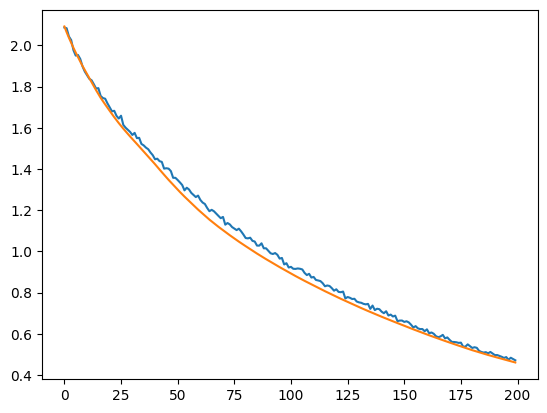

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [74]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9801 - loss: 0.4582
Test Accuracy: 0.9737


#This is the second part


In [75]:
model2 = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(30,)),
    layers.Dropout(0.2),
    layers.Dense(50, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(25, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [80]:
history2 = model.fit(X_train_scaled, y_train, epochs=600, validation_data=(X_test_scaled,y_test))

Epoch 1/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9707 - loss: 0.2250 - val_accuracy: 0.9561 - val_loss: 0.2313
Epoch 2/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9737 - loss: 0.2262 - val_accuracy: 0.9561 - val_loss: 0.2311
Epoch 3/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9727 - loss: 0.2215 - val_accuracy: 0.9561 - val_loss: 0.2306
Epoch 4/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9849 - loss: 0.2016 - val_accuracy: 0.9561 - val_loss: 0.2304
Epoch 5/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9758 - loss: 0.2233 - val_accuracy: 0.9561 - val_loss: 0.2301
Epoch 6/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9756 - loss: 0.2280 - val_accuracy: 0.9561 - val_loss: 0.2295
Epoch 7/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9758 - loss: 0.2189 - val_accuracy: 0.9561 - val_loss: 0.2293
Epoch 8/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9815 - loss: 0.2014 - val_accuracy: 0.956

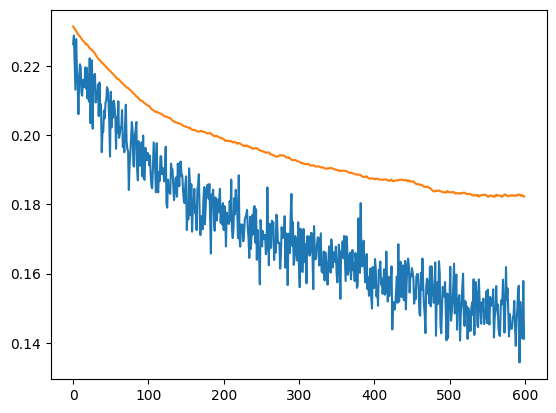

In [81]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [82]:
loss2, accuracy2 = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9623 - loss: 0.1729
Test Accuracy: 0.9474
